In [1]:
%run preamble.py
%matplotlib inline

!mkdir -p images tables results

from IPython.display import HTML

In [2]:
#
# Uniform Baseline
#
N = 10 ** 5
DS_NAME = "Uniform Distribution"
DS_DATA = [ np.random.uniform(10,100,size=N) ]
DS_QUANTILES = np.linspace(0,1,11)

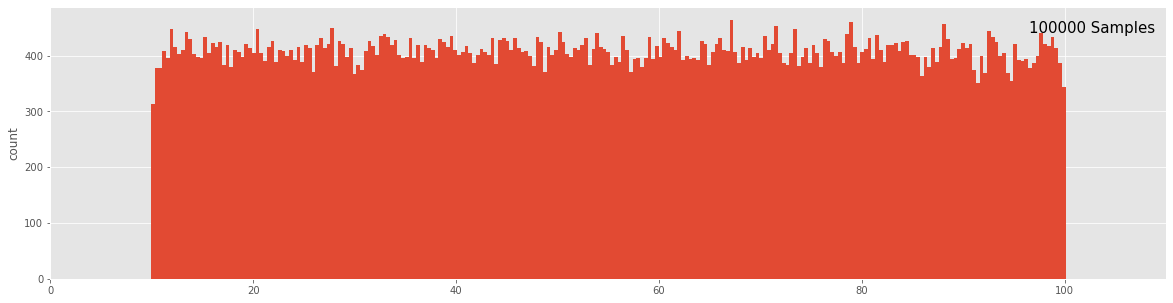

In [3]:
total = np.concatenate(DS_DATA)
ax = lin_plot(total, [])
plt.savefig("images/" + DS_NAME + "_distribution")

In [4]:
STATS = evaluate_all(DS_DATA, DS_QUANTILES)

# exact
Insert .
Merge ...
Quantiles ...
# tdigest
Insert .
Merge ...
Quantiles ...
# hdr
Insert .
Merge ...
Quantiles ...
# dd
Insert .
Merge ...
Quantiles ...
# circllhist
Insert .
Merge ...
Quantiles ...


In [5]:
save(json.dumps(STATS), "results/" + DS_NAME + ".json")

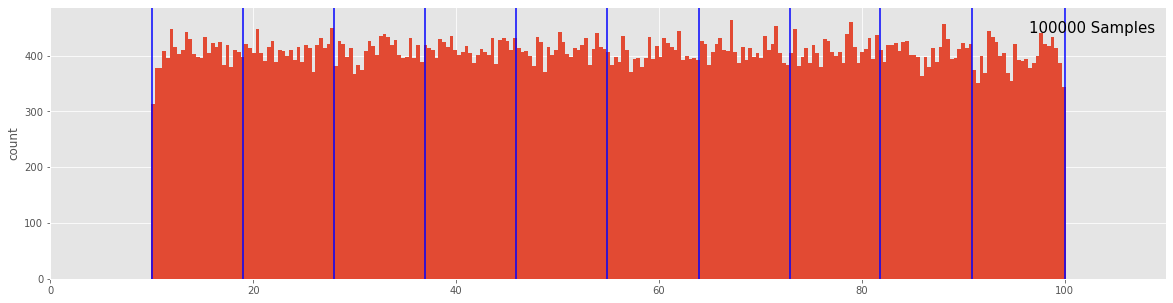

In [6]:
lin_plot(total, [STATS["exact"]["quantiles"][q] for q in DS_QUANTILES ])
plt.savefig("images/" + DS_NAME + "_distribution_percentiles")

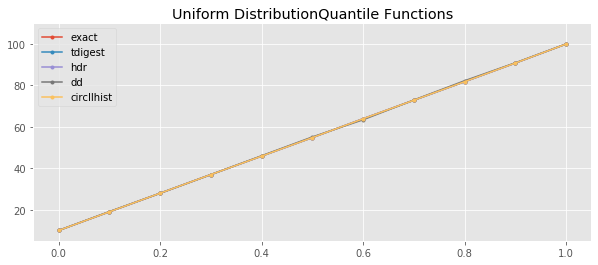

In [7]:
#
# Stats: Quantiles
#
df = stats_quantiles(STATS)[METHODS]

save(df.to_latex(), "tables/" + DS_NAME + "_quantiles.tex")

plt.figure(figsize=(10,4))
plt.title(DS_NAME + "Quantile Functions")
for name in METHODS:
    plt.plot(DS_QUANTILES, [ STATS[name]["quantiles"][q] for q in DS_QUANTILES ] ,".-")

plt.legend(METHODS)
plt.ylim(5, 110)
plt.savefig("images/" + DS_NAME + "_quantile_comparison")

In [8]:
df

,exact,tdigest,hdr,dd,circllhist
q0,10.000310,10.000310,10.000,10.000310,10.000970
q.1,19.012718,19.027037,19.023,19.106877,19.010046
q.2,27.982663,27.998562,27.983,27.940046,27.989592
q.3,36.979302,36.972399,36.991,36.968653,36.978162
q.4,45.889006,45.885311,45.919,46.066116,45.881834
q.5,54.828165,54.830361,54.847,55.151485,54.830071
q.6,63.935587,63.917284,63.935,63.439604,63.929487
q.7,72.871001,72.840775,72.895,72.973255,72.873106
q.8,81.809655,81.820977,81.855,82.277445,81.816637
q.9,90.807916,90.824135,90.815,90.930942,90.820354


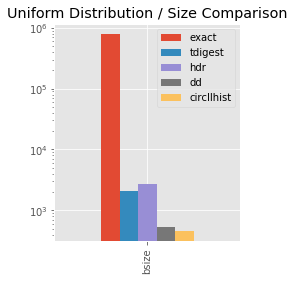

In [9]:
#
# Stats: Size
#
df = stats_size(STATS)[METHODS]

save(df.to_latex(), "tables/" + DS_NAME + "_size.tex")

fig = plt.figure(figsize=(10/3,4))
ax = plt.subplot(1,1,1)
df.plot(kind="bar", ax=ax)
plt.title(DS_NAME + " / Size Comparison")
plt.yscale("log")
plt.savefig("images/" + DS_NAME + "_size")

In [10]:
df

,exact,tdigest,hdr,dd,circllhist
bsize,800161,2112,2676.0,538,453.0


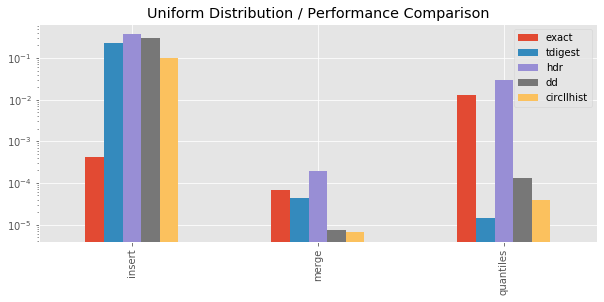

In [11]:
#
# Stast: Timing
#
df = stats_timing(STATS)[METHODS]

save(df.to_latex(), "tables/" + DS_NAME + "_perf.tex")

fig = plt.figure(figsize=(10, 4))
ax = plt.subplot(1,1,1)
df.plot(kind="bar", ax=ax)
plt.yscale("log")
plt.title(DS_NAME + " / Performance Comparison")
plt.savefig("images/" + DS_NAME + "_perf")

In [12]:
df

,exact,tdigest,hdr,dd,circllhist
insert,0.000425,0.230131,0.376193,0.299493,0.099673
merge,0.000067,0.000044,0.000191,0.000007,0.000007
quantiles,0.012948,0.000015,0.029096,0.000131,0.000040


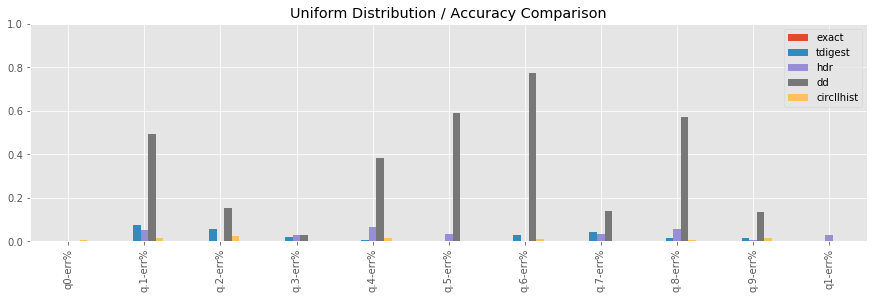

In [13]:
#
# Stats: Accuracy
#
df = stats_qerr(STATS)[METHODS]

save(df.to_latex(), "tables/" + DS_NAME + "_accuracy.tex")

fig = plt.figure(figsize=(15, 4))
ax = plt.subplot(1,1,1)
df.plot(kind="bar", ax=ax)
plt.yscale("linear")
plt.ylim(0, 1)
plt.title(DS_NAME + " / Accuracy Comparison")
plt.savefig("images/" + DS_NAME + "_accuracy")

In [14]:
df

,exact,tdigest,hdr,dd,circllhist
q0-err%,0.0,0.000000,0.003102,0.000000,0.006597
q.1-err%,0.0,0.075314,0.054080,0.495244,0.014055
q.2-err%,0.0,0.056818,0.001205,0.152296,0.024764
q.3-err%,0.0,0.018668,0.031634,0.028797,0.003083
q.4-err%,0.0,0.008052,0.065362,0.385954,0.015628
q.5-err%,0.0,0.004006,0.034353,0.589697,0.003476
q.6-err%,0.0,0.028626,0.000917,0.775753,0.009540
q.7-err%,0.0,0.041479,0.032934,0.140322,0.002889
q.8-err%,0.0,0.013840,0.055427,0.571802,0.008534
q.9-err%,0.0,0.017861,0.007801,0.135480,0.013697
